In [9]:
import pandas as pd # pandas -> pd: Xử lý và phân tích dữ liệu
import seaborn as sns # seaborn -> sns: Trực quan hoá dữ liệu.
import matplotlib.pyplot as plt # Matplotlib -> plt: Vẽ các biểu đồ, dễ đọc
import numpy as np # Numpy -> np: Phép toán số học và đại số tuyến tính mảng ma trận
from scipy import stats 
from matplotlib import font_manager
import unicodedata

In [10]:
mall_data = pd.read_csv('Mall_Customers.csv')

print('Có {} dòng and {} cột trong tập dữ liệu'.format(mall_data.shape[0],mall_data.shape[1]))

Có 200 dòng and 5 cột trong tập dữ liệu


In [12]:
from sklearn.cluster import KMeans

In [13]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # tập hợp chỉ có các biến số

In [18]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # khởi tạo và điều chỉnh mô hình K-Means

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # gắn labels (nhãn) vào điểm

c:\Users\Karrot\anaconda3\envs\ml-1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karrot\anaconda3\envs\ml-1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


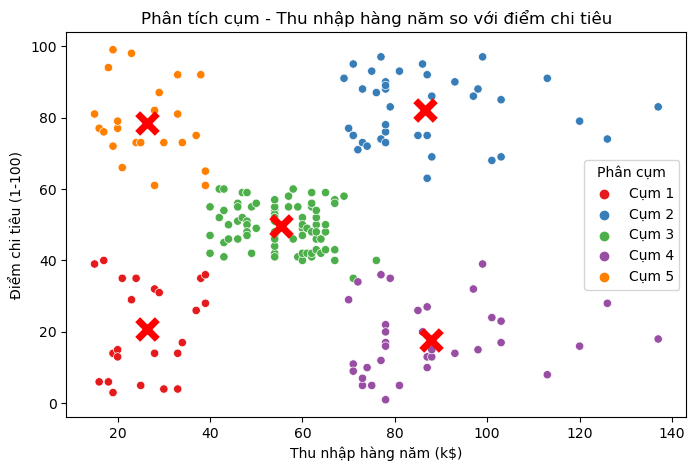

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 1, figsize=(8, 5))  # Chỉ tạo một subplot

# Chỉ định tên DataFrame cho đối số 'data'
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                         hue='Cluster', ax=axes, palette='Set1', legend='full')

axes.scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2], marker='x', s=200, c="red", linewidths=5)

# Đặt tên cho các trục và tiêu đề
axes.set_xlabel('Thu nhập hàng năm (k$)')
axes.set_ylabel('Điểm chi tiêu (1-100)')
axes.set_title('Phân tích cụm - Thu nhập hàng năm so với điểm chi tiêu')
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles=handles, labels=["Cụm 1", "Cụm 2", "Cụm 3", "Cụm 4", "Cụm 5"], title='Phân cụm')

plt.show()

c:\Users\Karrot\anaconda3\envs\ml-1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karrot\anaconda3\envs\ml-1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Thời gian chạy: 0.2760 giây
Độ chính xác (Silhouette Score): 0.4445


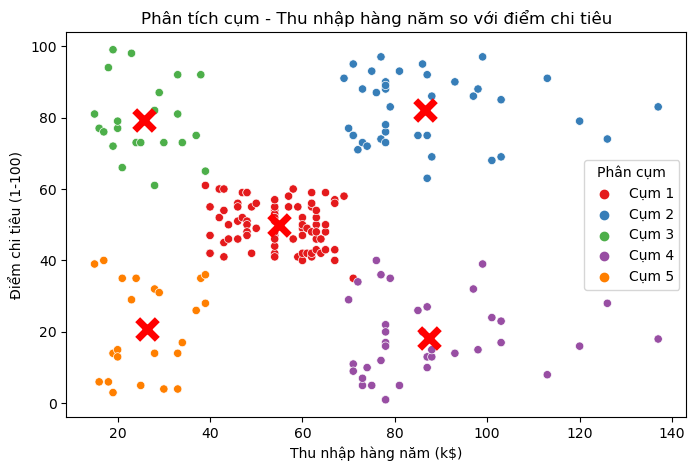

In [51]:
import time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Dữ liệu và thuật toán KMeans
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, init='k-means++')

start_time = time.time()

# Thực hiện clustering và lấy nhãn
labels = kmeans.fit_predict(X_numerics)

end_time = time.time()

# Đánh giá chất lượng mô hình bằng Silhouette Score
silhouette_avg = silhouette_score(X_numerics, labels)

# In thông tin
print(f'Thời gian chạy: {end_time - start_time:.4f} giây')
print(f'Độ chính xác (Silhouette Score): {silhouette_avg:.4f}')

# Tạo DataFrame từ dữ liệu đã clustering
KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:, 'Cluster'] = labels

# Biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 1, figsize=(8, 5))

scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                         hue='Cluster', ax=axes, palette='Set1', legend='full')

axes.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=200, c="red", linewidths=5)

axes.set_xlabel('Thu nhập hàng năm (k$)')
axes.set_ylabel('Điểm chi tiêu (1-100)')
axes.set_title('Phân tích cụm - Thu nhập hàng năm so với điểm chi tiêu')
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles=handles, labels=["Cụm 1", "Cụm 2", "Cụm 3", "Cụm 4", "Cụm 5"], title='Phân cụm')

plt.show()
